In [1]:
import pandas as pd
import numpy as np
pd.set_option('mode.chained_assignment', None)

In [2]:
data_sex = pd.read_csv('data/소년범죄_성별_전과2018.csv', index_col=0, encoding = 'cp949', engine='python')
data_repeat = pd.read_csv('data/소년범죄_재범기간_종류2018.csv', index_col=0, encoding = 'cp949', engine='python')

In [3]:
data_sex

,전과별(2),2018,2018.1,2018.2,2018.3,2018.4,2018.5,2018.6,2018.7,2018.8,2018.9,2018.10,2018.11
전과별(1),,,,,,,,,,,,,
전과별(1),전과별(2),합계,합계,합계,성인,성인,성인,소년,소년,소년,미상,미상,미상
전과별(1),전과별(2),계,남,여,계,남,여,계,남,여,계,남,여
합계,소계,1721102,1376363,344739,1637836,1309027,328809,66135,53872,12263,17131,13464,3667
전과있음,소계,731834,643616,88218,708555,623213,85342,22308,19556,2752,971,847,124
전과있음,1범,162407,127803,34604,155006,121656,33350,7164,5958,1206,237,189,48
전과있음,2범,112010,94298,17712,108172,91044,17128,3705,3148,557,133,106,27
전과있음,3범,82778,72332,10446,80104,69973,10131,2554,2253,301,120,106,14
전과있음,4범,62411,55711,6700,60533,54022,6511,1803,1621,182,75,68,7
전과있음,5범,49320,44723,4597,47907,43450,4457,1356,1224,132,57,49,8


In [4]:
data_sex = data_sex.drop(columns=['2018', '2018.1', '2018.2', '2018.3', '2018.4', '2018.5', '2018.9', '2018.10', '2018.11'], axis=0)

In [5]:
data_sex = data_sex.drop(['전과별(1)'], axis=0)

In [6]:
data_sex = data_sex.rename(columns={'2018.6':'소계', '2018.7':'소년남자', '2018.8':'소년여자'})

In [7]:
data_sex

,전과별(2),소계,소년남자,소년여자
전과별(1),,,,
합계,소계,66135,53872,12263
전과있음,소계,22308,19556,2752
전과있음,1범,7164,5958,1206
전과있음,2범,3705,3148,557
전과있음,3범,2554,2253,301
전과있음,4범,1803,1621,182
전과있음,5범,1356,1224,132
전과있음,6범,1004,915,89
전과있음,7범,825,758,67


In [8]:
data_repeat = pd.DataFrame(data_repeat)

In [9]:
data_repeat = data_repeat.reset_index()

In [10]:
data_repeat1 = data_repeat.loc[[0, 1, 2, 3, 4, 11, 16, 25, 35, 39, 43, 60]]

In [11]:
data_repeat1 = data_repeat1.rename(columns={'2018':'전체범죄건수', '2018.1':'동종재범전체건수', '2018.2':'동종1개월', 
                                           '2018.3':'동종3개월','2018.4':'동종6개월', '2018.5':'동종1년', '2018.6':'동종2년', 
                                           '2018.7':'동종3년', '2018.8':'동종3년초과','2018.9':'이종전체건수', '2018.10':'이종1개월', 
                                           '2018.11':'이종3개월', '2018.12':'이종6개월', '2018.13':'이종1년', '2018.14':'이종2년', 
                                          '2018.15':'이종3년', '2018.16':'이종3년초과'})

In [12]:
data_repeat1

,범죄별(1),범죄별(2),범죄별(3),전체범죄건수,동종재범전체건수,동종1개월,동종3개월,동종6개월,동종1년,동종2년,동종3년,동종3년초과,이종전체건수,이종1개월,이종3개월,이종6개월,이종1년,이종2년,이종3년,이종3년초과
0,범죄별(1),범죄별(2),범죄별(3),합계,동종재범,동종재범,동종재범,동종재범,동종재범,동종재범,동종재범,동종재범,이종재범,이종재범,이종재범,이종재범,이종재범,이종재범,이종재범,이종재범
1,범죄별(1),범죄별(2),범죄별(3),소계,소계,1개월 이내,3개월 이내,6개월 이내,1년 이내,2년 이내,3년 이내,3년 초과,소계,1개월 이내,3개월 이내,6개월 이내,1년 이내,2년 이내,3년 이내,3년 초과
2,합계,소계,소계,26905,13091,2227,2499,2101,3826,1472,741,225,13814,1823,2455,2024,4293,1783,1012,424
3,형법범,소계,소계,22364,11204,2028,2244,1819,3165,1160,602,186,11160,1645,2125,1717,3339,1294,730,310
4,형법범,재산범죄,소계,13104,6889,1561,1512,1107,1891,484,253,81,6215,1192,1333,995,1666,550,322,157
11,형법범,강력범죄(흉악),소계,874,353,45,68,53,93,60,29,5,521,39,65,68,204,86,43,16
16,형법범,강력범죄(폭력),소계,7175,3453,380,582,575,1030,522,281,83,3722,353,607,562,1236,545,301,118
25,형법범,위조범죄,소계,545,231,14,34,48,72,41,16,6,314,21,51,43,102,51,39,7
35,형법범,풍속범죄,소계,44,19,-,7,2,5,1,3,1,25,3,5,3,6,4,2,2
39,형법범,과실범죄,소계,19,10,2,1,1,3,2,1,-,9,-,-,2,4,2,-,1


In [13]:
data_repeat1 = data_repeat1.drop([0], axis=0)
data_repeat1 = data_repeat1.drop([1], axis=0)

In [14]:
data_repeat1 = data_repeat1.rename(columns={'범죄별(1)':'범죄종류'})

In [15]:
list = ['합계', '형법범합계', '형법재산범죄', '형법강력(흉)범죄', '형법강력(폭)범죄', '형법위조범죄', '형법풍속범죄',
        '형법과실범죄', '형법기타', '특별범죄']
data_repeat1['범죄종류'] = list

In [16]:
data_repeat1 = data_repeat1.drop(columns=['범죄별(2)', '범죄별(3)'])

In [17]:
data_repeat1 = data_repeat1.reset_index()

In [18]:
data_repeat1 = data_repeat1.drop(columns=['index'])

In [19]:
data_repeat1

,범죄종류,전체범죄건수,동종재범전체건수,동종1개월,동종3개월,동종6개월,동종1년,동종2년,동종3년,동종3년초과,이종전체건수,이종1개월,이종3개월,이종6개월,이종1년,이종2년,이종3년,이종3년초과
0,합계,26905,13091,2227,2499,2101,3826,1472,741,225,13814,1823,2455,2024,4293,1783,1012,424
1,형법범합계,22364,11204,2028,2244,1819,3165,1160,602,186,11160,1645,2125,1717,3339,1294,730,310
2,형법재산범죄,13104,6889,1561,1512,1107,1891,484,253,81,6215,1192,1333,995,1666,550,322,157
3,형법강력(흉)범죄,874,353,45,68,53,93,60,29,5,521,39,65,68,204,86,43,16
4,형법강력(폭)범죄,7175,3453,380,582,575,1030,522,281,83,3722,353,607,562,1236,545,301,118
5,형법위조범죄,545,231,14,34,48,72,41,16,6,314,21,51,43,102,51,39,7
6,형법풍속범죄,44,19,-,7,2,5,1,3,1,25,3,5,3,6,4,2,2
7,형법과실범죄,19,10,2,1,1,3,2,1,-,9,-,-,2,4,2,-,1
8,형법기타,603,249,26,40,33,71,50,19,10,354,37,64,44,121,56,23,9
9,특별범죄,4541,1887,199,255,282,661,312,139,39,2654,178,330,307,954,489,282,114


In [20]:
import matplotlib.pyplot as plt
from matplotlib import rcParams, style
style.use('ggplot')

from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname = 'c:/Windows/Fonts/malgun.ttf').get_name()
rc('font', family = font_name)

In [21]:
data_all = []
label = ['소년범죄건수', '재범발생건수']
data_all.append(data_sex['소계'][0])
data_all.append(data_repeat1['전체범죄건수'][0])
data_all

['66135', '26905']

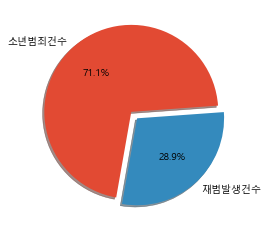

In [22]:
explode = [0.05, 0.05]
plt.plot(figsize = (15, 10))
plt.pie(data_all, labels=label, autopct='%.1f%%', startangle=260, counterclock=False,
        explode=explode, shadow=True)
plt.savefig('data/전체소년_범죄_재범비율.png')
plt.show()

In [23]:
data_repeat2 = data_repeat1.drop([1, 0], axis=0)

In [24]:
data_repeat3 = data_repeat2.drop(columns=['전체범죄건수', '동종재범전체건수', '이종전체건수'], axis=0)

In [25]:
data_repeat3

,범죄종류,동종1개월,동종3개월,동종6개월,동종1년,동종2년,동종3년,동종3년초과,이종1개월,이종3개월,이종6개월,이종1년,이종2년,이종3년,이종3년초과
2,형법재산범죄,1561,1512,1107,1891,484,253,81,1192,1333,995,1666,550,322,157
3,형법강력(흉)범죄,45,68,53,93,60,29,5,39,65,68,204,86,43,16
4,형법강력(폭)범죄,380,582,575,1030,522,281,83,353,607,562,1236,545,301,118
5,형법위조범죄,14,34,48,72,41,16,6,21,51,43,102,51,39,7
6,형법풍속범죄,-,7,2,5,1,3,1,3,5,3,6,4,2,2
7,형법과실범죄,2,1,1,3,2,1,-,-,-,2,4,2,-,1
8,형법기타,26,40,33,71,50,19,10,37,64,44,121,56,23,9
9,특별범죄,199,255,282,661,312,139,39,178,330,307,954,489,282,114


In [26]:
data_repeat3 = data_repeat3.set_index(['범죄종류'])

In [27]:
# 각행의 데이터를 리스트로 생성
cdata = []
cdata2 = []
cdata3 = []
cdata4 = []
cdata5 = []
cdata6 = []
cdata7 = []
cdata8 = []
for i in range(len(data_repeat3.loc['형법재산범죄'])):
    cdata.append(data_repeat3.loc['형법재산범죄'][i])
    cdata2.append(data_repeat3.loc['형법강력(흉)범죄'][i])
    cdata3.append(data_repeat3.loc['형법강력(폭)범죄'][i])
    cdata4.append(data_repeat3.loc['형법위조범죄'][i])
    cdata5.append(data_repeat3.loc['형법풍속범죄'][i])
    cdata6.append(data_repeat3.loc['형법과실범죄'][i])
    cdata7.append(data_repeat3.loc['형법기타'][i])
    cdata8.append(data_repeat3.loc['특별범죄'][i])

In [28]:
for x in range(len(cdata)):
    if cdata[x] == '-':
        cdata[x] = 0
    elif cdata2[x] == '-':
        cdata2[x] = 0
    elif cdata3[x] == '-':
        cdata3[x] = 0
    elif cdata4[x] == '-':
        cdata4[x] = 0
    elif cdata5[x] == '-':
        cdata5[x] = 0
    elif cdata6[x] == '-':
        cdata6[x] = 0
    elif cdata7[x] == '-':
        cdata7[x] = 0
    elif cdata8[x] == '-':
        cdata8[x] = 0

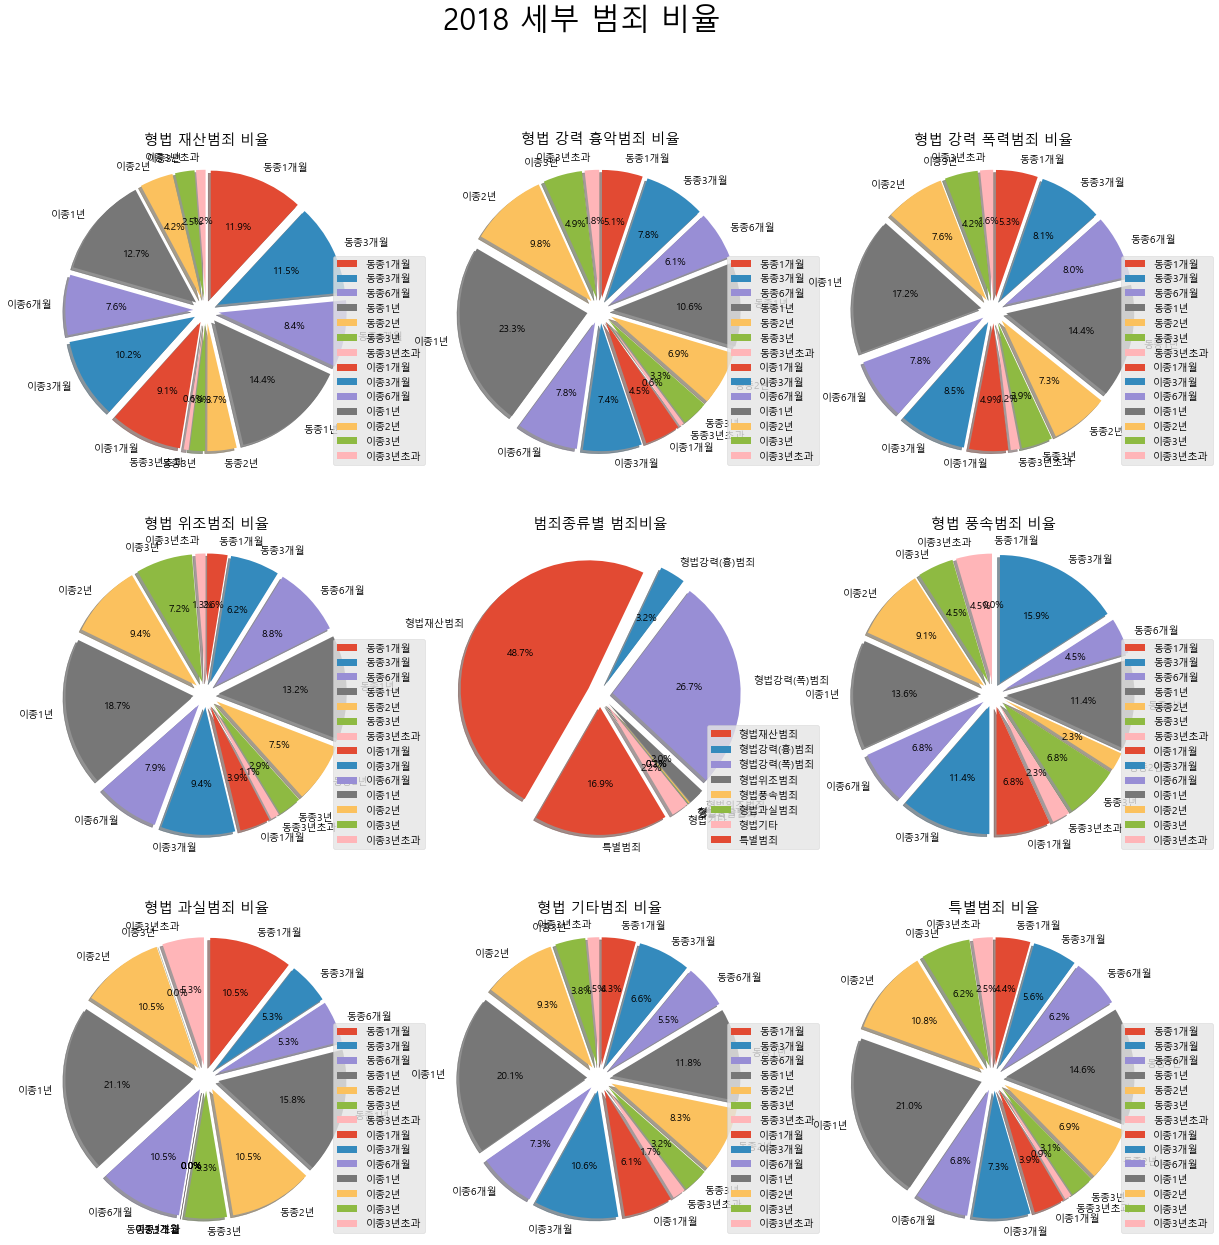

<Figure size 432x288 with 0 Axes>

In [41]:
explode1 = [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]
explode2 = [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]
color = ['']
column = ['동종1개월', '동종3개월', '동종6개월', '동종1년', '동종2년', '동종3년', '동종3년초과',
          '이종1개월', '이종3개월', '이종6개월', '이종1년', '이종2년', '이종3년', '이종3년초과']
f, ax = plt.subplots(3, 3, figsize = (20, 20))
ax[1, 1].pie(data_repeat2['전체범죄건수'], labels=data_repeat2['범죄종류'], autopct='%.1f%%',
        startangle=240, counterclock=False, explode=explode1, shadow=True)
ax[1, 1].legend(loc='lower right', bbox_to_anchor=(1.2,0.0))
ax[1, 1].set_title('범죄종류별 범죄비율')

ax[0, 0].pie(cdata, labels=column, autopct='%.1f%%',
        startangle=90, counterclock=False, explode=explode2, shadow=True)
ax[0, 0].legend(loc='lower right', bbox_to_anchor=(1.2,0.0))
ax[0, 0].set_title('형법 재산범죄 비율')

ax[0, 1].pie(cdata2, labels=column, autopct='%.1f%%',
        startangle=90, counterclock=False, explode=explode2, shadow=True)
ax[0, 1].legend(loc='lower right', bbox_to_anchor=(1.2,0.0))
ax[0, 1].set_title('형법 강력 흉악범죄 비율')

ax[0, 2].pie(cdata3, labels=column, autopct='%.1f%%',
        startangle=90, counterclock=False, explode=explode2, shadow=True)
ax[0, 2].legend(loc='lower right', bbox_to_anchor=(1.2,0.0))
ax[0, 2].set_title('형법 강력 폭력범죄 비율')

ax[1, 0].pie(cdata4, labels=column, autopct='%.1f%%',
        startangle=90, counterclock=False, explode=explode2, shadow=True)
ax[1, 0].legend(loc='lower right', bbox_to_anchor=(1.2,0.0))
ax[1, 0].set_title('형법 위조범죄 비율')

ax[1, 2].pie(cdata5, labels=column, autopct='%.1f%%',
        startangle=90, counterclock=False, explode=explode2, shadow=True)
ax[1, 2].legend(loc='lower right', bbox_to_anchor=(1.2,0.0))
ax[1, 2].set_title('형법 풍속범죄 비율')

ax[2, 0].pie(cdata6, labels=column, autopct='%.1f%%',
        startangle=90, counterclock=False, explode=explode2, shadow=True)
ax[2, 0].legend(loc='lower right', bbox_to_anchor=(1.2,0.0))
ax[2, 0].set_title('형법 과실범죄 비율')

ax[2, 1].pie(cdata7, labels=column, autopct='%.1f%%',
        startangle=90, counterclock=False, explode=explode2, shadow=True)
ax[2, 1].legend(loc='lower right', bbox_to_anchor=(1.2,0.0))
ax[2, 1].set_title('형법 기타범죄 비율')

ax[2, 2].pie(cdata8, labels=column, autopct='%.1f%%',
        startangle=90, counterclock=False, explode=explode2, shadow=True)
ax[2, 2].legend(loc='lower right', bbox_to_anchor=(1.2,0.0))
ax[2, 2].set_title('특별범죄 비율')

f.suptitle('2018 세부 범죄 비율', fontsize=30)
plt.show()
plt.savefig('data/2018_범죄종류별_범죄비율.png')
